In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('News_York_data.csv')

This csv contains the 1660 articles reporting sexual harassment on NYT, including title,releasing time and the content. (when searching the keyword "sexual harassment" on NYT website, the results show there are 1660 articles.)

In [3]:
df 

,title,time,content
0,Latino Business Group Considers Harassment All...,2018-02-10T18:53:11+0000,Directors of an influential Latino business or...
1,I Was Assaulted. He Was Applauded.,2018-03-09T21:01:10+0000,Jules Woodson says she was 17 when her youth p...
2,She Took Over Ohio State’s Scarred Hockey Prog...,2018-03-16T00:07:50+0000,MINNEAPOLIS — Ridder Arena at the University o...
3,Boston Symphony Finds Accusations Against Char...,2018-03-02T22:31:44+0000,The Boston Symphony announced Friday that four...
4,"‘House of Cards’ Resumes Production, With Dian...",2018-01-31T15:00:12+0000,Kevin Spacey is out. Diane Lane and Greg Kinne...
5,Steve Wynn Is Accused of Rape and Coercion in ...,2018-02-28T02:47:25+0000,A woman told the police that she had a child w...
6,Unicef Official Resigns Over His Past Conduct ...,2018-02-23T01:22:38+0000,"A senior official at Unicef, the United Nation..."
7,Weinstein Co. Will File for Bankruptcy After D...,2018-02-26T05:17:32+0000,LOS ANGELES — The Weinstein Company said that ...
8,Minnie Driver on the #MeToo Cause,2018-02-21T02:38:00+0000,NaN
9,"Nancy Dubuc, Head of A&E Networks, Is in Talks...",2018-03-12T21:03:00+0000,Shane Smith is preparing to cede his position ...


The frequency of title words using

In [4]:
all_title=[]
for title in df['title']:
    all_title.extend(str(title).split())

In [5]:
word_count={}

In [6]:
for word in all_title:
    if word not in word_count:
        word_count[word]=1
    else:
        word_count[word]=word_count[word]+1

In [7]:
df_word_count=pd.Series(word_count).to_frame().reset_index()

In [8]:
stop_words=set(['of','the','a','and','in','your','for','is','on','A','With','at','What','How','about','Dealbook','Is','Your','New','to',
    'The','After','Today:','by','it','as','Not','Are','Who','Briefing','In','York','over','From','It','About','Over',
    'Will','Tuesday','Monday','Wednesday','Thursday','We','2017','DealBook','his','Be','‘The','Times','an','This',
    'Sexual','Harassment','Donald','Harvy'
    ])


Removing some preposition as well as some high frequency words without meaningless,like the date,the name of the papar"New""York""Times".

In [9]:
def is_not_stop_word(x):
    return x not in stop_words
df_clean_word=df_word_count[
    df_word_count['index'].apply(is_not_stop_word)
].sort_values(by=0,ascending=False)

In [10]:
temp_dict = {}
for index, value in  df_clean_word.as_matrix():
    temp_dict[index] = value

In [12]:
from wordcloud import WordCloud
wc=WordCloud
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

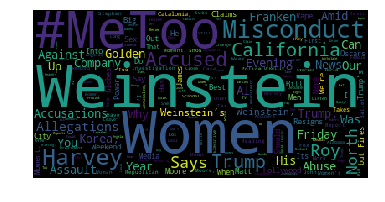

In [13]:
w=wc().generate_from_frequencies(temp_dict)
import matplotlib.pyplot as plt
plt.imshow(w)
plt.axis('off')

After filtering the meaningless word，the word cloud shows that "Weinstein","#Metoo","Women" are the most frequent words when reporting sexual harassment on NYT. It indicates that Weinstein is the absolute subjector of coverage on NYT. Besides, "Women" is the second significant word when journalists and editors write the news of title. It shows, at least on NYK times, sexual harassment is closely related to gender problem. #Metoo the name of online social movement of anti-sexual harassment, is the thrid frequent words of title using, which means the influence of online social media towards traditional media.

In [16]:
from datetime import datetime
from dateutil import parser
import numpy
import matplotlib
from matplotlib import pyplot as plt

The frequency of topwords using in content with time

In [17]:
def parse_datetime(x):
    try:
        return parser.parse(x)
    except:
        return numpy.nan
df['datetime']=df['time'].apply(parse_datetime)

In [18]:
def has_weinstein(t):
    return 'weinstein' in str(t).lower()
df['kw_weinstein']=df['content'].apply(has_weinstein)

In [19]:
df['kw_weinstein'].value_counts()

False    1062
True      599
Name: kw_weinstein, dtype: int64

In [20]:
def has_metoo(t):
    return 'metoo' in str(t).lower()
df['kw_metoo']=df['content'].apply(has_metoo)

In [21]:
def has_trump(t):
    return 'trump' in str(t).lower()
df['kw_trump']=df['content'].apply(has_trump)

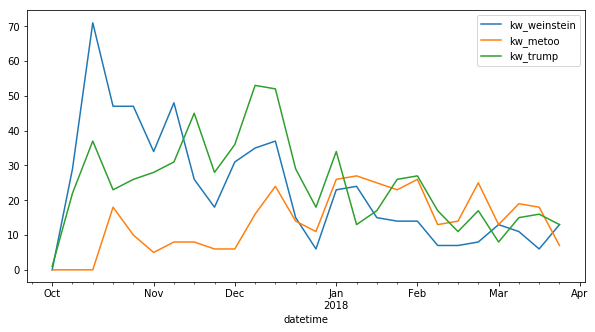

In [22]:
df.set_index('datetime').resample('1w').aggregate('sum').plot(figsize=(10,5))

Form the previous word count of title, the data shows "Weinstein","Trump","#Metoo" are the top frequent words when writing the title. so the line chart below shows how frequent these third words mentioned in the total articles with time. the chart shows, in the beginning, the article mentions "Weinstein" very frequent. and then "trump" became more frequent in the early of November, and this situation continued while both of these figures decreased with time. Compared with "Weinstein" and "Trump", " #Metoo" had been mentioned less, even after January. 2018, the figure increased slightly.

 The frequency of coverage

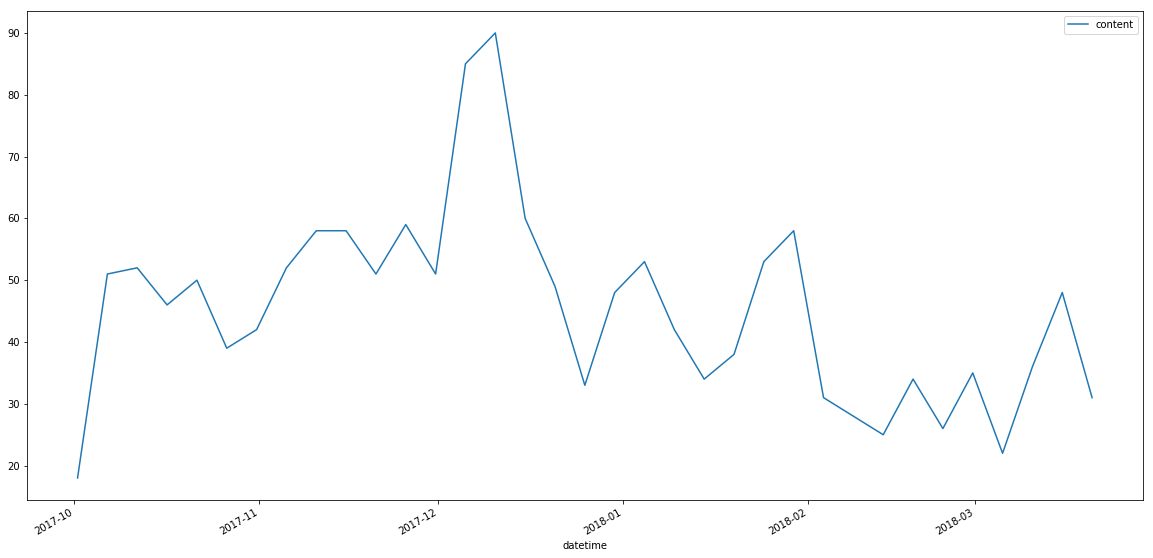

In [24]:
df_count=df.set_index('datetime').resample('5d').aggregate('count')
df_time=df_count.drop(['title', 'time','kw_weinstein','kw_metoo','kw_trump'], axis=1)
df_time.plot(figsize=(20,10))

As for the frequency of reporting "sexual harassment", the chart shows during the middle of December, the number of reports reached the peak, and after that, the figures decreased with time.